In [30]:
import importlib
import graph as glib

importlib.reload(glib)

graph = glib.read_simple_graph("pero.txt")
model = glib.graph_model(graph)
glib.print_model(model, graph)

   0-1 0-2 0-3 0-4 1-2 1-3 1-4 1-5 2-1 2-1 2-3 2-4 2-5 3-4 3-4 3-5 4-2 4-2 4-2 4-2 4-5
0   -1  -1  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1    1   0   0   0  -1  -1  -1  -1   1   1   0   0   0   0   0   0   0   0   0   0   0
2    0   1   0   0   1   0   0   0  -1  -1  -1  -1  -1   0   0   0   1   1   1   1   0
3    0   0   1   0   0   1   0   0   0   0   1   0   0  -1  -1  -1   0   0   0   0   0
4    0   0   0   1   0   0   1   0   0   0   0   1   0   1   1   0  -1  -1  -1  -1  -1
5    0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   1   0   0   0   0   1


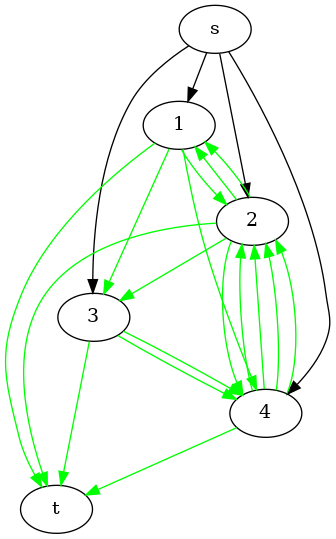

In [36]:
import pygraphviz as pgv
from IPython.display import Image, display

def agraph(graph, solutions_or_maybe_graph2=None):
    ag = pgv.AGraph(strict=False, directed=True)

    for node in range(len(graph)):
        if node == 0:
            ag.add_node(node, label="s")
        elif node == len(graph)-1:
            ag.add_node(node, label="t")
        else:
            ag.add_node(node)
    for u, destinations in enumerate(graph):
        for v in destinations:
            ag.add_edge(u, v, color="black" if u==0 else "green")
    return ag

def show_graph(graph):
    ag = agraph(graph)
    image = Image(ag.draw(format='png', prog='dot'))
    display(image)


show_graph(graph)

Running HiGHS 1.5.0 [date: 2022-12-15, git hash: fb38df1ce]
Copyright (c) 2022 HiGHS under MIT licence terms
Presolving model
6 rows, 21 cols, 42 nonzeros
6 rows, 16 cols, 32 nonzeros
5 rows, 16 cols, 28 nonzeros
Presolve : Reductions: rows 5(-1); columns 16(-5); elements 28(-14)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          6    -1.5000000000e+01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 6
Objective value     :  1.5000000000e+01
HiGHS run time      :          0.00


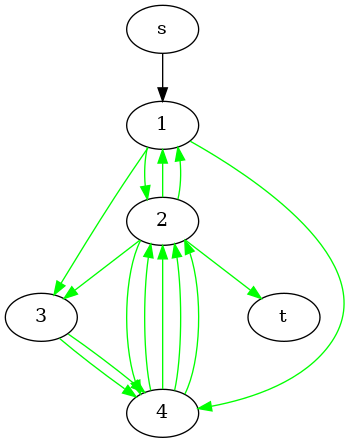

In [39]:
import lp_solver as lpslib

importlib.reload(lpslib)

lp_model = lpslib.lp_model(model)
solution = lpslib.solve_model(lp_model)
optimized_graph = lpslib.create_optimized_graph(solution, graph)

show_graph(optimized_graph)